In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_column',100)
plt.rc("font", size=10)

In [2]:
df=pd.read_csv('hotel_bookings.csv')
df.head(99)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [3]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:
df.shape

(119390, 32)

In [5]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [6]:
df['target']=np.where(df['is_canceled'].isin(['1']),1,0)

In [7]:
df['target'].mean()

0.37041628277075134

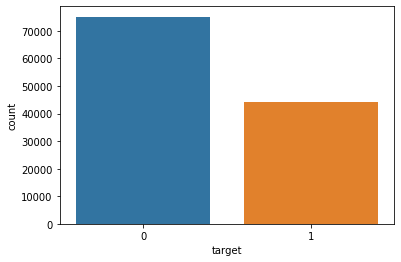

In [8]:
sns.countplot(x='target',data=df)
plt.show()

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
nan_replacement={'country':'unknown','children':0,'agent':0,'company':0}
df=df.fillna('nan_replacement')

In [11]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [12]:
df['meal'].replace('Undefined','SC',inplace=True)

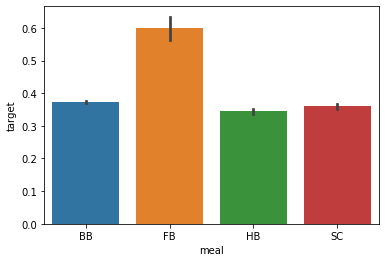

In [13]:
from numpy import mean
ax=sns.barplot(x='meal',y='target',data=df,estimator=mean)

In [14]:
df.groupby('country')['target'].mean()

country
ABW                0.000000
AGO                0.566298
AIA                0.000000
ALB                0.166667
AND                0.714286
                     ...   
VNM                0.250000
ZAF                0.387500
ZMB                0.500000
ZWE                0.500000
nan_replacement    0.137295
Name: target, Length: 178, dtype: float64

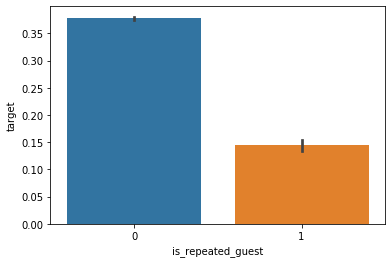

In [15]:
ax=sns.barplot(x='is_repeated_guest',y='target',data=df,estimator=mean)

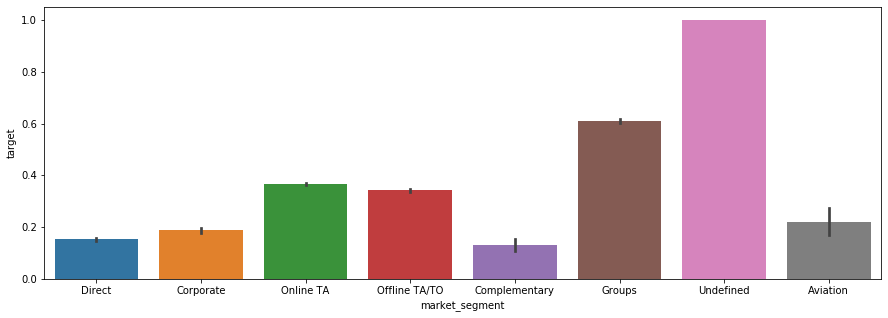

In [16]:
ax,fig=plt.subplots(1,figsize=(15,5))
ax=sns.barplot(x='market_segment',y='target',data=df,estimator=mean)

In [17]:
df.groupby('market_segment')['target'].count()

market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Undefined            2
Name: target, dtype: int64

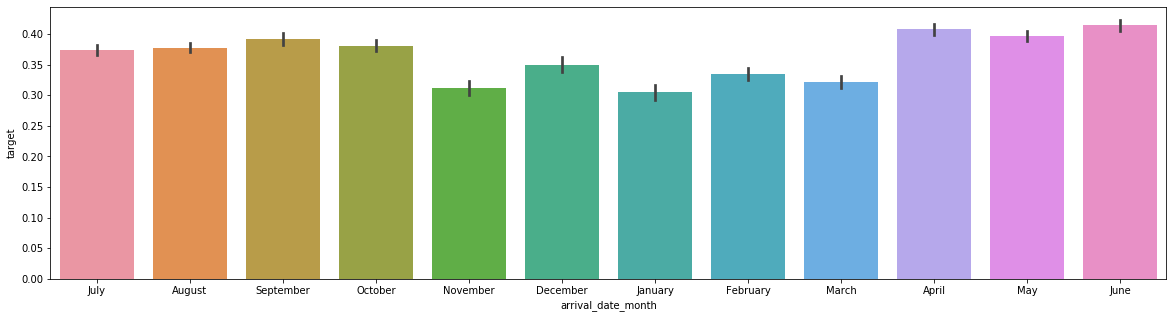

In [18]:
ax,fig=plt.subplots(1,figsize=(20,5))
ax=sns.barplot(x='arrival_date_month',y='target',data=df,estimator=mean)

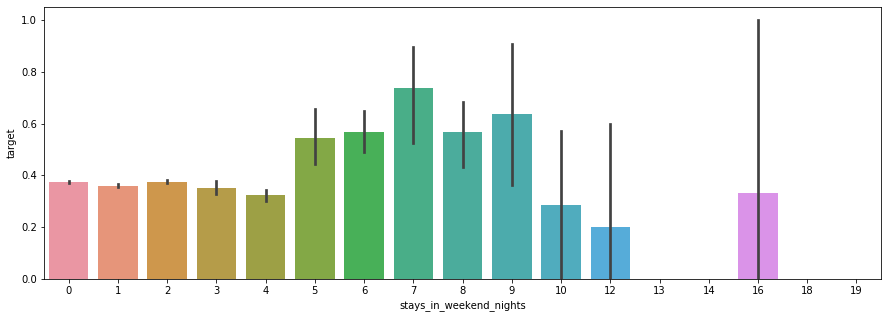

In [19]:
ax,fig=plt.subplots(1,figsize=(15,5))
ax=sns.barplot(x='stays_in_weekend_nights',y='target',data=df,estimator=mean)

In [20]:
df.groupby('arrival_date_month')['target'].mean()

arrival_date_month
April        0.407972
August       0.377531
December     0.349705
February     0.334160
January      0.304773
July         0.374536
June         0.414572
March        0.321523
May          0.396658
November     0.312334
October      0.380466
September    0.391702
Name: target, dtype: float64

In [21]:
df.groupby('stays_in_weekend_nights')['target'].mean()

stays_in_weekend_nights
0     0.375034
1     0.359401
2     0.374835
3     0.352661
4     0.322372
5     0.544304
6     0.568627
7     0.736842
8     0.566667
9     0.636364
10    0.285714
12    0.200000
13    0.000000
14    0.000000
16    0.333333
18    0.000000
19    0.000000
Name: target, dtype: float64

In [22]:
df['stays_in_week_nights_rank']=pd.qcut(df['stays_in_week_nights'].rank(method='first').values,7,duplicates='drop').codes+1

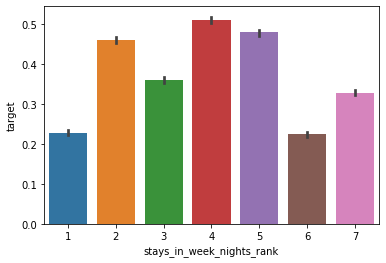

In [23]:
a=sns.barplot(x="stays_in_week_nights_rank",y="target",data=df,estimator=mean)

In [24]:
df.groupby('stays_in_week_nights_rank')['stays_in_week_nights'].min()

stays_in_week_nights_rank
1    0
2    1
3    1
4    2
5    2
6    3
7    4
Name: stays_in_week_nights, dtype: int64

In [25]:
df['stay_in_week_night_grp']=np.where(df['stays_in_week_nights_rank'].isin(['1','2']),1,np.where(df['stays_in_week_nights_rank'].isin(['3','4']),2,np.where(df['stays_in_week_nights_rank'].isin(['5','6']),3,4)))
df.groupby('stay_in_week_night_grp')['target'].mean()

stay_in_week_night_grp
1    0.344102
2    0.436135
3    0.351881
4    0.328682
Name: target, dtype: float64

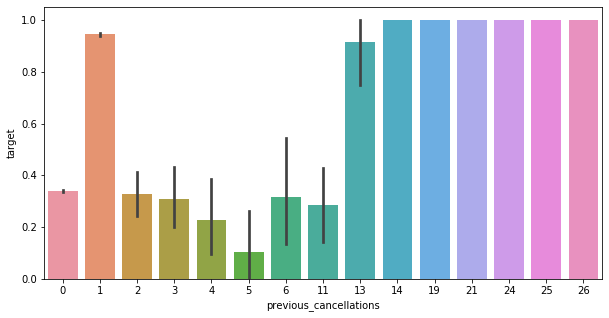

In [26]:
ax,fig=plt.subplots(1,figsize=(10,5))
ax = sns.barplot(x="previous_cancellations", y="target", data=df, estimator=mean)

In [27]:
df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [28]:
df['previous_cancellations_ind']=np.where(df['previous_cancellations'].isin(['0']),0,1)

In [29]:
df.groupby('previous_cancellations_ind')['target'].value_counts()

previous_cancellations_ind  target
0                           0         74624
                            1         38282
1                           1          5942
                            0           542
Name: target, dtype: int64

In [30]:
df.groupby('booking_changes')['target'].mean()*100

booking_changes
0     40.854176
1     14.227226
2     20.131406
3     15.533981
4     17.819149
5     16.949153
6     28.571429
7      9.677419
8     23.529412
9     12.500000
10    16.666667
11     0.000000
12     0.000000
13     0.000000
14    20.000000
15     0.000000
16    50.000000
17     0.000000
18     0.000000
20     0.000000
21     0.000000
Name: target, dtype: float64

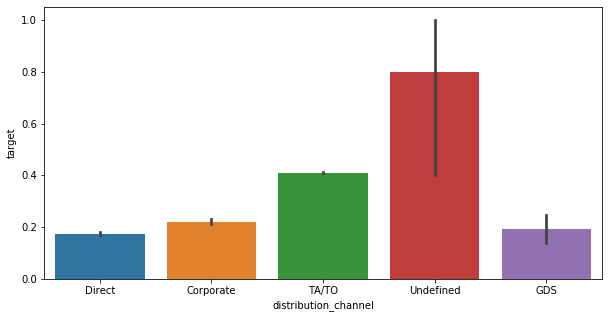

In [31]:
ax,fig=plt.subplots(1,figsize=(10,5))
ax = sns.barplot(x="distribution_channel", y="target", data=df, estimator=mean)

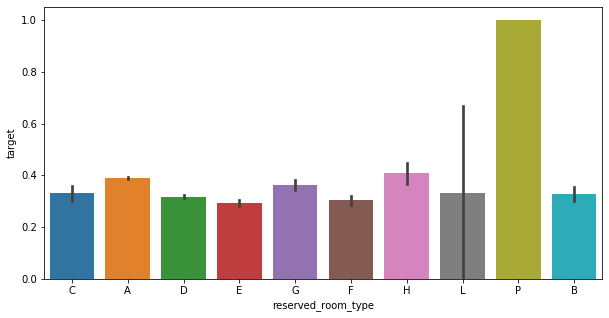

In [32]:
ax,fig=plt.subplots(1,figsize=(10,5))
ax = sns.barplot(x="reserved_room_type", y="target", data=df, estimator=mean)

In [33]:
df1=df[df.target==1]
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,target,stays_in_week_nights_rank,stay_in_week_night_grp,previous_cancellations_ind
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,nan_replacement,0,Transient,82.0,0,1,Canceled,2015-05-06,1,5,3,0
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15,nan_replacement,0,Transient,105.5,0,0,Canceled,2015-04-22,1,5,3,0
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,nan_replacement,0,Transient,123.0,0,0,Canceled,2015-06-23,1,6,3,0
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,nan_replacement,0,Transient,107.0,0,2,Canceled,2015-05-11,1,7,4,0
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,nan_replacement,nan_replacement,0,Transient,108.3,0,2,Canceled,2015-05-29,1,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,April,17,25,0,0,0,0,0,BB,FRA,Online TA,TA/TO,0,0,0,D,K,1,No Deposit,9,nan_replacement,0,Transient,0.0,0,3,Canceled,2017-04-25,1,1,1,0
111355,City Hotel,1,4,2017,June,23,5,1,0,1,0,0,BB,PRT,Corporate,Corporate,1,0,4,A,A,0,No Deposit,nan_replacement,238,0,Transient,65.0,0,0,Canceled,2017-06-05,1,1,1,0
111924,City Hotel,1,7,2017,May,22,31,0,1,1,0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,nan_replacement,238,0,Transient,65.0,0,0,Canceled,2017-05-31,1,3,2,0
111925,City Hotel,1,6,2017,July,29,17,1,0,1,0,0,BB,PRT,Corporate,Corporate,1,1,1,A,D,0,No Deposit,nan_replacement,238,0,Transient,65.0,0,0,No-Show,2017-07-17,1,1,1,1


In [34]:
df2=df1[df1.target==1]
df2['reserved_room_type'].value_counts()

A    33630
D     6102
E     1914
F      880
G      763
B      368
C      308
H      245
P       12
L        2
Name: reserved_room_type, dtype: int64

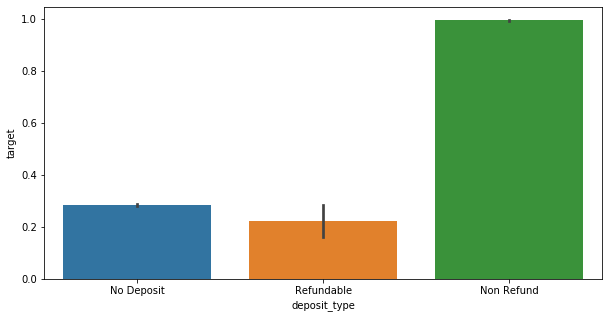

In [35]:
ax,fig=plt.subplots(1,figsize=(10,5))
ax = sns.barplot(x="deposit_type", y="target", data=df, estimator=mean)

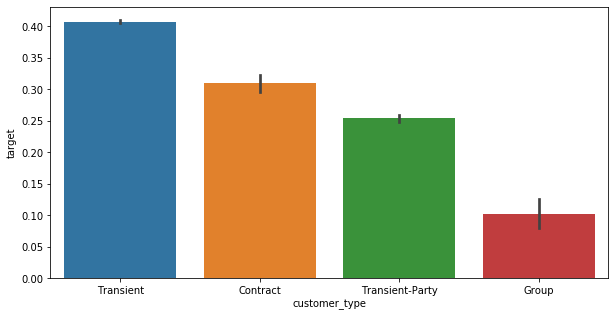

In [36]:
ax,fig=plt.subplots(1,figsize=(10,5))
ax = sns.barplot(x="customer_type", y="target", data=df, estimator=mean)

In [38]:
df.groupby('customer_type')['target'].count()

customer_type
Contract            4076
Group                577
Transient          89613
Transient-Party    25124
Name: target, dtype: int64

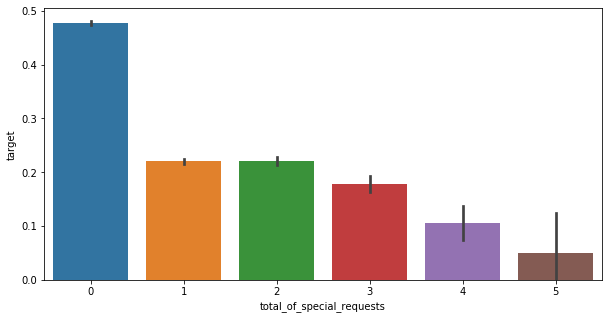

In [41]:
ax,fig=plt.subplots(1,figsize=(10,5))
ax = sns.barplot(x="total_of_special_requests", y="target", data=df, estimator=mean)

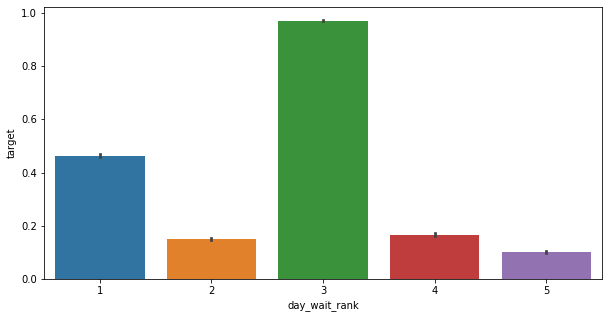

In [43]:
df['day_wait_rank']=pd.qcut(df['days_in_waiting_list'].rank(method='first').values,5,duplicates='drop').codes+1
ax,fig=plt.subplots(1,figsize=(10,5))
a=sns.barplot(x="day_wait_rank",y="target",data=df,estimator=mean)

In [44]:
df['day_wait_ind']=np.where(df['day_wait_rank'].isin(['3']),1,0)
df.groupby('day_wait_ind')['target'].count()

day_wait_ind
0    95512
1    23878
Name: target, dtype: int64

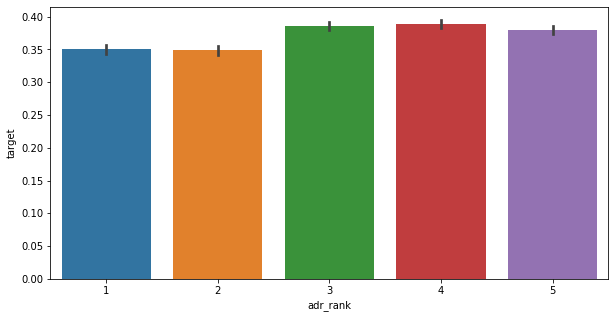

In [46]:
df['adr_rank']=pd.qcut(df['adr'].rank(method='first').values,5,duplicates='drop').codes+1
ax,fig=plt.subplots(1,figsize=(10,5))
a=sns.barplot(x="adr_rank",y="target",data=df,estimator=mean)

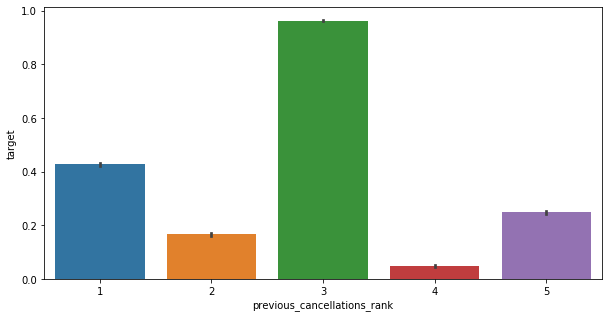

In [47]:
df['previous_cancellations_rank']=pd.qcut(df['previous_cancellations'].rank(method='first').values,5,duplicates='drop').codes+1
ax,fig=plt.subplots(1,figsize=(10,5))
a=sns.barplot(x="previous_cancellations_rank",y="target",data=df,estimator=mean)

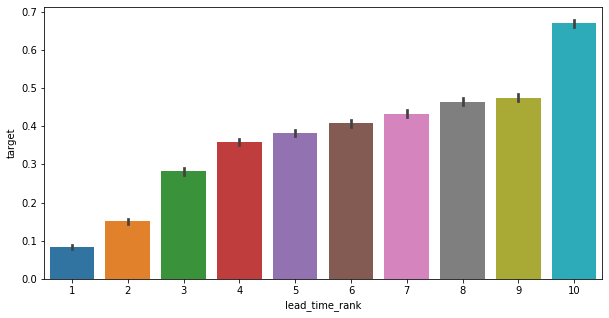

In [48]:
df['lead_time_rank']=pd.qcut(df['lead_time'].rank(method='first').values,10,duplicates='drop').codes+1
ax,fig=plt.subplots(1,figsize=(10,5))
a=sns.barplot(x="lead_time_rank",y="target",data=df,estimator=mean)

In [54]:
dep=['target']
col_num= ['lead_time','adr']   
         
col_char=['day_wait_ind','total_of_special_requests','customer_type','reserved_room_type',
          'distribution_channel','market_segment',
          'previous_cancellations_ind','stay_in_week_night_grp']

In [55]:
X_char_dum = pd.get_dummies(df[col_char], drop_first = True)

In [56]:
X_all=pd.concat([df[col_num],X_char_dum],axis=1, join='inner')

In [57]:
X=X_all
Y=df['target']

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=5)
dtree.fit(X_train, y_train)

rf_1000 = RandomForestClassifier(n_estimators=1000,
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 7)
rf_1000.fit(X_train, y_train)

C:\Users\kakkar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [65]:
y_pred = logreg.predict(X_test)
print('regression score',logreg.score(X_test, y_test))

regression score 0.8719323226400871


In [67]:
y_pred_tree=dtree.predict(X_test)
print('dtree score',dtree.score(X_test,y_test))

dtree score 0.8791356059971522


In [70]:
y_pred_RF=rf_1000.predict(X_test)
print('rf score',rf_1000.score(X_test,y_test))

rf score 0.876957869168272


In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[21953   418]
 [ 4169  9277]]


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     22371
           1       0.98      0.69      0.81     13446

    accuracy                           0.88     35817
   macro avg       0.91      0.84      0.86     35817
weighted avg       0.89      0.88      0.87     35817



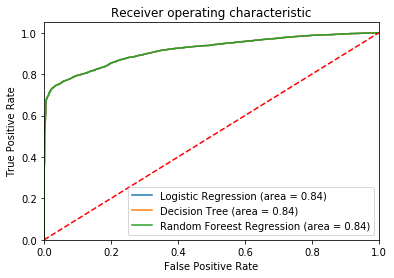

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))
RF_roc_auc=roc_auc_score(y_test, rf_1000.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
plt.plot(fpr, tpr, label='Random Foreest Regression (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()